In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [30]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [31]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    global cdx
    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])

In [9]:
# Read the IRIS dataset 
df = pd.read_csv('../iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
Cl = IA[:,4]

In [33]:
# get IRIS classification
IC = np.unique(IA[:,4])
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
cdx = np.array([1,2]) # Always "Versicolor" and "Virginica"


In [34]:
def second_dimension(first_feature, second_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global twoFeature
    fdx = np.array([first_feature, second_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 2))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        i += 1

    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

    # Creating Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)

    # Graphing
    plt.close('all')
    plot_decision_regions(NF_Std, NC, classifier = ada)
    plt.title('Adaline - Gradient Descent', fontsize='medium')
    plt.xlabel(str(IrisF[first_feature])) #fix the label
    plt.ylabel(str(IrisF[second_feature])) #fix the label
    plt.legend(loc='upper left', fontsize='small')
    plt.show()
    twoFeature.append((ada.accuracy(NF_Std, NC)*100))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

In [35]:
def third_dimension(first_feature, second_feature, third_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global threeFeature
    fdx = np.array([first_feature, second_feature, third_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 3))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        i += 1

    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()


    # Creating Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    
    threeFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

In [36]:
def fourth_dimension(first_feature, second_feature, third_feature, fourth_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global fourFeature
    fdx = np.array([first_feature, second_feature, third_feature, fourth_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 4))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        i += 1

    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
    NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()



    # Creating Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    fourFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

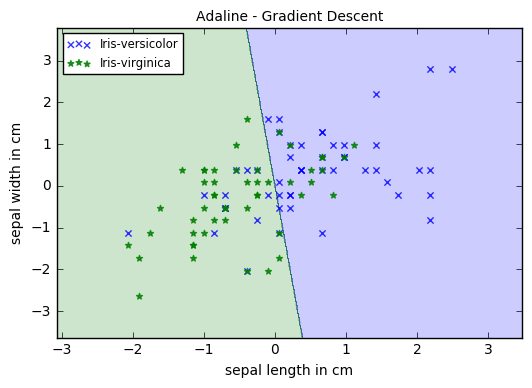

Adaline Accuracy Level: 75.0%


In [37]:
# ALL SIX CASES OF USING TWO FEATURES AT A TIME
# Sepal Length & Sepal Width
twoFeature_description = []
twoFeature = [];
twoFeature_description.append("Sepal Length & Sepal Width")
second_dimension(0,1)

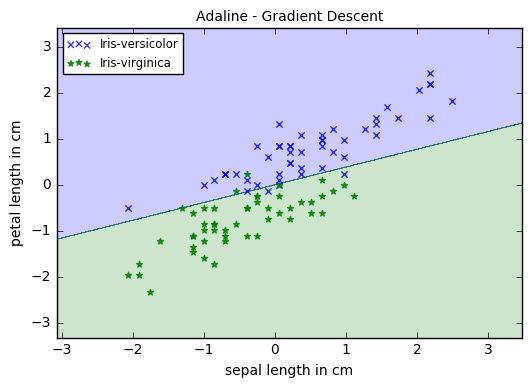

Adaline Accuracy Level: 94.0%


In [38]:
# Sepal Length & Petal Length
twoFeature_description.append("Sepal Length & Petal Length")
second_dimension(0,2)

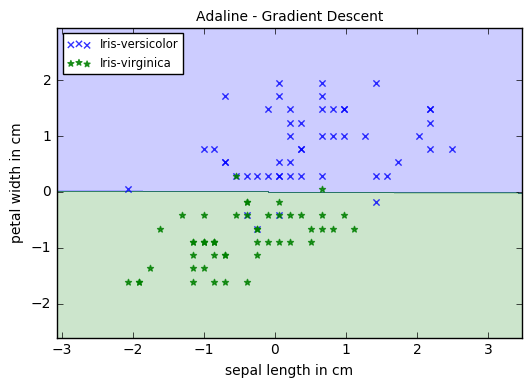

Adaline Accuracy Level: 94.0%


In [39]:
# Sepal Length & Petal Width
twoFeature_description.append("Sepal Length & Petal Width")
second_dimension(0,3)

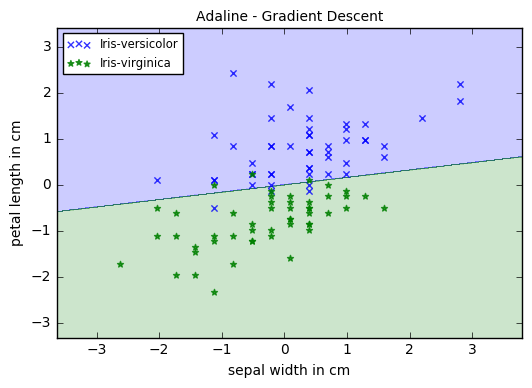

Adaline Accuracy Level: 93.0%


In [40]:
# Sepal Width & Petal Length
twoFeature_description.append("Sepal Width & Petal Length")
second_dimension(1,2)

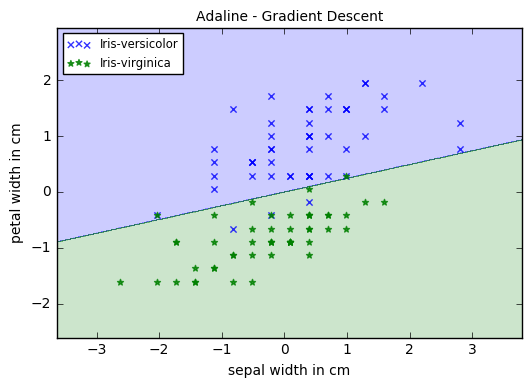

Adaline Accuracy Level: 95.0%


In [41]:
# Sepal Width & Petal Width
twoFeature_description.append("Sepal Width & Petal Width")
second_dimension(1,3)

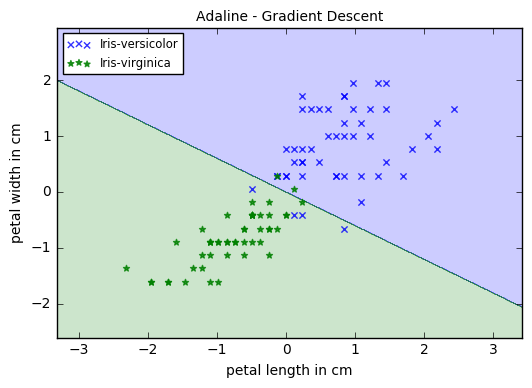

Adaline Accuracy Level: 94.0%


In [42]:
# Petal Length & Petal Width
twoFeature_description.append("Petal Length & Petal Width")
second_dimension(2,3)

In [43]:
twoFeature

[75.0, 94.0, 94.0, 93.0, 95.0, 94.0]

In [44]:
# ALL FOUR CASES OF USING THREE FEATURES AT A TIME
threeFeature = []
threeFeature_description = []
# Sepal Length, Sepal Width, Petal Length
threeFeature_description.append("Sepal Length, Sepal Width, Petal Length")
third_dimension(0,1,2)
# Sepal Width, Petal Length, Petal Width
threeFeature_description.append("Sepal Width, Petal Length, Petal Width")
third_dimension(1,2,3)
# Sepal Length, Petal Length, Petal Width
threeFeature_description.append("Sepal Length, Petal Length, Petal Width")
third_dimension(0,2,3)
# Sepal Length, Sepal Width, Petal Width
threeFeature_description.append("Sepal Length, Sepal Width, Petal Width")
third_dimension(0,1,3)

Adaline Accuracy Level: 93.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 95.0%


In [45]:
threeFeature

[93.0, 96.0, 96.0, 95.0]

In [46]:
# THE ONE CASE OF USING ALL FEATURES AT ONCE
fourFeature = []
fourFeature_description = []
# Sepal Length, Sepal Width, Petal Length, Petal Width
fourFeature_description.append("Sepal Length, Sepal Width, Petal Length, Petal Width")
fourth_dimension(0,1,2,3)

Adaline Accuracy Level: 97.0%


In [47]:
fourFeature

[97.0]

In [60]:
# Two features table
from tabulate import tabulate
two_table = []

for idx, element in enumerate(twoFeature):
    two_table.append([twoFeature_description[idx], twoFeature[idx]])

print(tabulate(two_table, headers=["Feature", "Accuracy (%)"]))

Feature                        Accuracy (%)
---------------------------  --------------
Sepal Length & Sepal Width               75
Sepal Length & Petal Length              94
Sepal Length & Petal Width               94
Sepal Width & Petal Length               93
Sepal Width & Petal Width                95
Petal Length & Petal Width               94


In [61]:
# Three features table
three_table = []

for idx, element in enumerate(threeFeature):
    three_table.append([threeFeature_description[idx], threeFeature[idx]])

print(tabulate(three_table, headers=["Feature", "Accuracy (%)"]))

Feature                                    Accuracy (%)
---------------------------------------  --------------
Sepal Length, Sepal Width, Petal Length              93
Sepal Width, Petal Length, Petal Width               96
Sepal Length, Petal Length, Petal Width              96
Sepal Length, Sepal Width, Petal Width               95


In [62]:
# Four features table
four_table = []

for idx, element in enumerate(fourFeature):
    four_table.append([fourFeature_description[idx], fourFeature[idx]])
    
print(tabulate(four_table, headers=["Feature", "Accuracy (%)"]))    

Feature                                                 Accuracy (%)
----------------------------------------------------  --------------
Sepal Length, Sepal Width, Petal Length, Petal Width              97
